In [1]:
from gensim import corpora
from parameters import *
from NLP_preprocessing import *
from LDA_model import *

import warnings
warnings.filterwarnings('ignore')


#read dataset, only keep desired text column and rename it
data = read_data(in_dir = IN_DIR, filename = FILENAME, text_col = TEXT_COL , 
                 renamed_text_col = RENAMED_TEXT_COL, text_language = LANGUAGE)
cleaned_text = process_text_col(data, text_col = RENAMED_TEXT_COL)  # processed Text Data

# Create Dictionary
id2word = corpora.Dictionary(cleaned_text)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in cleaned_text]

100%|██████████| 26/26 [33:13<00:00, 76.67s/it]


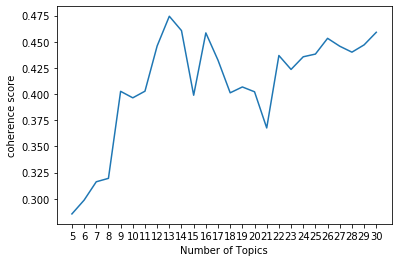

In [3]:
coherence_vs_topics(texts= cleaned_text,corpus = corpus, dictionary = id2word ,min_number_topics = 5, max_number_topics = 30)

# from IPython.display import Image
# Image('out/coherence_Topics_plot.png')

In [ ]:
# NUM_TOPICS = 9
lda_model = lda(num_topics = NUM_TOPICS, corpus = corpus , dictionary = id2word)

In [ ]:
pd.set_option('display.max_colwidth', 100)
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=cleaned_text)
df_dominant_topic.head()

In [ ]:
#Wordcloud 
get_wordcloud_LDA(ldamodel = lda_model, num_topics = NUM_TOPICS)

In [ ]:
word_count_topic(ldamodel = lda_model, num_topics = NUM_TOPICS , texts = cleaned_text)

In [ ]:
sentences_chart(ldamodel=lda_model, corpus=corpus, start = 0, end = 14)   

In [ ]:
Plot_topic_dist(ldamodel= lda_model, num_topics = NUM_TOPICS, corpus = corpus)

In [ ]:
tsne_plot(ldamodel = lda_model, corpus = corpus,num_topics = NUM_TOPICS , Keep_well_separated_pcnt = 0.35)

In [ ]:
pyldavis_plot(ldamodel = lda_model ,corpus = corpus,  mds = "tsne")